# **TO DO FIRST**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

https://github.com/bchao1/Anime-Face-Dataset/

https://www.kaggle.com/tunguz/70000-real-faces-1

In [2]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

# **Get Gdrive data**

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1HG7YnakUkjaxtNMclbl2t5sJwGLcHYsI"})
downloaded.GetContentFile('data.tgz')

InvalidConfigError: ignored

In [ ]:
# tar -zxvf '/content/drive/My Drive/dl_projects/Copy of data.tgz' -C '/content/drive/My Drive/dl_projects/'

!tar -xvzf '/content/drive/My Drive/dl_projects/Copy of data.tgz' -C '/content/drive/My Drive/dl_projects/anime_vs_human'

# ***Data without storing in Gdrive***

**Downloading Human Faces**

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d tunguz/70000-real-faces-1 -p '/content/drive/My Drive/dl_projects'

100% 19.1G/19.1G [08:07<00:00, 30.5MB/s]
100% 19.1G/19.1G [08:07<00:00, 42.0MB/s]


In [ ]:
import os
os.makedirs("anime_vs_human/humans", exist_ok=True)
!unzip "/content/drive/My Drive/dl_projects/*.zip" -d 'anime_vs_human/humans'

**Downlaoding Anime Faces**

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1HG7YnakUkjaxtNMclbl2t5sJwGLcHYsI"})
downloaded.GetContentFile('data.tgz')

ApiRequestError: ignored

In [ ]:
os.makedirs("anime_vs_human/anime", exist_ok=True)
!tar -xvzf 'data.tgz' -C 'anime_vs_human/'

# ***Kaggle uploaded data - Start from here***

https://www.kaggle.com/sanyam1992000/anime-faces-vs-human-faces

In [3]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [4]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [5]:
!kaggle datasets download -d sanyam1992000/anime-faces-vs-human-faces

100% 1.26G/1.26G [00:12<00:00, 115MB/s] 
100% 1.26G/1.26G [00:12<00:00, 108MB/s]


In [6]:
!unzip "*.zip"

Archive:  anime-faces-vs-human-faces.zip
  inflating: Data/anime/0_2000.jpg   
  inflating: Data/anime/1000_2000.jpg  
  inflating: Data/anime/1001_2000.jpg  
  inflating: Data/anime/1002_2000.jpg  
  inflating: Data/anime/1003_2000.jpg  
  inflating: Data/anime/1004_2000.jpg  
  inflating: Data/anime/1005_2000.jpg  
  inflating: Data/anime/1006_2000.jpg  
  inflating: Data/anime/1007_2000.jpg  
  inflating: Data/anime/1008_2000.jpg  
  inflating: Data/anime/1009_2000.jpg  
  inflating: Data/anime/100_2000.jpg  
  inflating: Data/anime/101_2000.jpg  
  inflating: Data/anime/102_2000.jpg  
  inflating: Data/anime/103_2000.jpg  
  inflating: Data/anime/104_2000.jpg  
  inflating: Data/anime/105_2000.jpg  
  inflating: Data/anime/106_2000.jpg  
  inflating: Data/anime/107_2000.jpg  
  inflating: Data/anime/108_2000.jpg  
  inflating: Data/anime/109_2000.jpg  
  inflating: Data/anime/10_2000.jpg  
  inflating: Data/anime/110_2000.jpg  
  inflating: Data/anime/111_2000.jpg  
  inflating: Da

# ***Here it all starts***




In [22]:
np.random.seed(2)

In [34]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/Data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

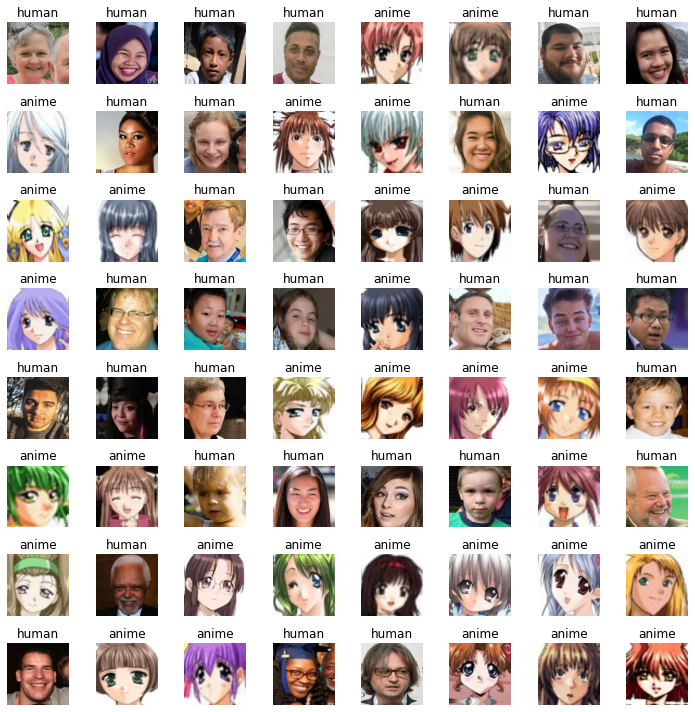

In [35]:
data.show_batch(rows=10, figsize=(10,10))

In [36]:
print(data.classes)
len(data.classes)

['anime', 'human']


2

In [37]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
# help(cnn_learner)
# doc(cnn_learner)

In [38]:
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.LOAD_TRUNCATED_IMAGES = True

In [39]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.077231,0.000000,1.000000,00:59
1,0.029079,0.000001,1.000000,00:59
2,0.014534,0.000003,1.000000,01:00
3,0.009989,0.000001,1.000000,01:00


In [40]:
os.makedirs("/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces",exist_ok=True)
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

In [41]:
learn.save(dir+"/Stage-2")

In [42]:
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

learn.load(dir + "/Stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (1605 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
human,human,human,human,human
Path: /content/Data;

Valid: LabelList (401 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
human,human,human,anime,human
Path: /content/Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [43]:
learn.export(dir+"/export.pkl")

# `Prediction`

In [44]:
dir = '/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces'
predictor = load_learner(dir)

In [45]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

In [49]:
from google.colab import files
my_file = files.upload()

Saving 75601406-352-k257678.jpg to 75601406-352-k257678.jpg
Saving Sara-Ali-Khan_16feb6f69a1_medium.jpg to Sara-Ali-Khan_16feb6f69a1_medium.jpg
Saving sara-ali-khan-1092139-19-04-2018-04-25-55.jpg to sara-ali-khan-1092139-19-04-2018-04-25-55.jpg
Saving n m.jpg to n m.jpg
Saving m.png to m.png
Saving index.jpeg to index.jpeg
Saving kushina.jpg to kushina (1).jpg
Saving sanyam.jpg to sanyam.jpg


In [50]:
path = list(my_file.keys())
path

['75601406-352-k257678.jpg',
 'Sara-Ali-Khan_16feb6f69a1_medium.jpg',
 'sara-ali-khan-1092139-19-04-2018-04-25-55.jpg',
 'n m.jpg',
 'm.png',
 'index.jpeg',
 'kushina.jpg',
 'sanyam.jpg']

anime
human
human
anime
anime
anime
anime
human


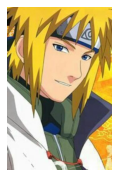

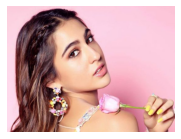

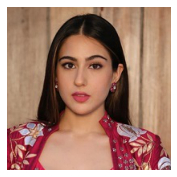

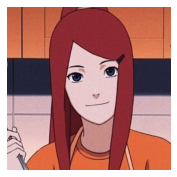

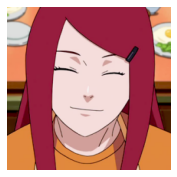

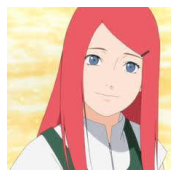

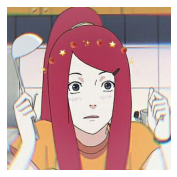

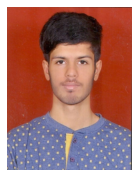

In [52]:
for i in path:
  img = open_image(i)
  img.show()
  print(my_predictor(i))